In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [26]:
df_train = pd.read_csv("../data/train.csv")  # 학습용 데이터
df_test = pd.read_csv("../data/submission.csv")  # 테스트 데이터(제출파일의 데이터)


In [27]:
df_train.head()  # 학습용 데이터 살펴보기


,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [28]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series


In [29]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])


In [30]:
for col in label_columns:
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train):][col]


In [31]:
# x_train, x_val, y_train, y_val = train_test_split(
#     df_train.drop("is_converted", axis=1),
#     df_train["is_converted"],
#     test_size=0.2,
#     shuffle=True,
#     random_state=400,
# )
# print(type(x_train))

### 각 데이터의 분포 및 종류  
- 결측치 유 : 
customer_country, com_reg_ver_win_rate, customer_type, historical_exisiting_cnt, id_strategic_ver, it_strategic_ver, idit_strategic_ver, customer_job, inquiry_type, product_category, product_subcategory, product_modelname, customer_country.1, expected_timeline, ver_win_rate_x, ver_win_ratio_per_bu, business_area, business_subarea

- 결측치 무 : 
bant_submit, business_unit, customer_idx, enterprise, lead_desc_length, customer_position, response_corporate, ver_cus, ver_pro, lead_owner

- 범주형
  - customer_country
  - business_unit
  - customer_type
  - enterprise
  - customer_job
  - inquiry_type
  - product_category
  - product_subcategory
  - product_modelname
  - customer_country.1
  - customer_position
  - response_corporate
  - expected_timeline
  - business_area
  - business_subarea
  
- 수치형
  - bant_submit
  - com_reg_ver_win_rate
  - customer_idx
  - historical_existing_cnt
  - id_strategic_ver
  - it_strategic_ver
  - idit_strategic_ver
  - lead_desc_length
  - ver_cus
  - ver_pro
  - ver_win_rate_x
  - ver_win_ratio_per_bu
  - lead_owner

In [ ]:
numeric_col = ["is_converted", "bant_submit", "com_reg_ver_win_rate", "customer_idx", "historical_existing_cnt", "id_strategic_ver", "it_strategic_ver", "idit_strategic_ver", "lead_desc_length", "ver_cus", "ver_pro", "ver_win_rate_x", "ver_win_ratio_per_bu", "lead_owner"]
x_train_numeric = df_train[numeric_col]
# 피어슨 상관계수로 계산 (0에 가까울수록 무관)
x_train_corr = df_train.corr()
x_train_corr["is_converted"].sort_values(ascending=False)


<AxesSubplot:>

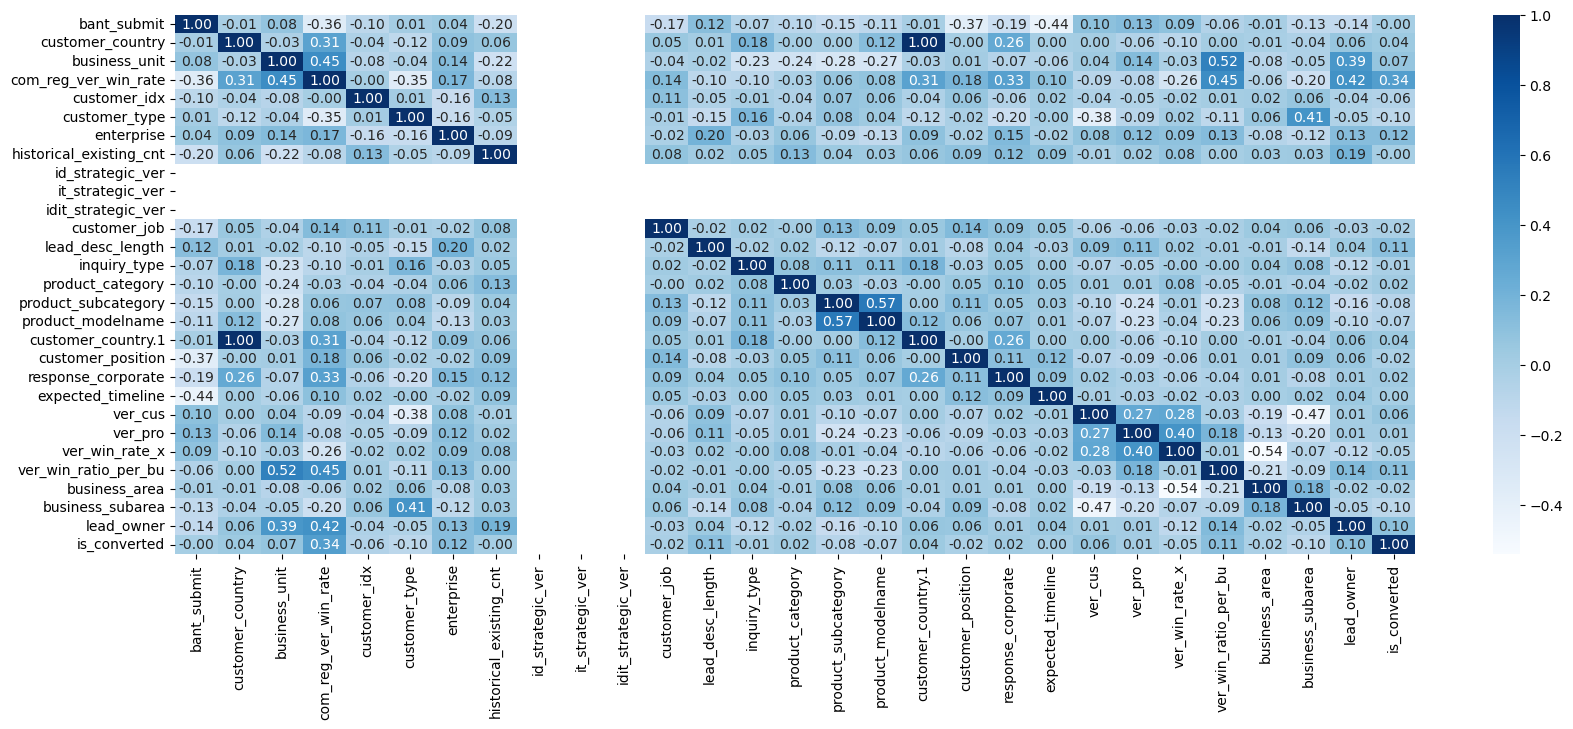

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,7))
sns.heatmap(x_train_corr, annot=True, fmt=".2f", cmap="Blues")


In [44]:
categoric_col = ["customer_country","business_unit","customer_type","enterprise","customer_job","inquiry_type","product_category","product_subcategory","product_modelname","customer_country.1","customer_position","response_corporate","expected_timeline","business_area","business_subarea"]
x_train_categoric = df_train[categoric_col]
x_train_categoric.head()


,customer_country,business_unit,customer_type,enterprise,customer_job,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline,business_area,business_subarea
0,9070,0,10,0,420,32,180,349,699,9070,47,33,246,0,28
1,8406,0,10,0,303,32,180,349,699,8406,21,33,246,0,0
2,6535,0,10,0,160,27,238,349,699,6535,80,21,246,0,17
3,3388,0,10,0,166,32,318,349,699,3388,21,21,246,0,44
4,5799,0,29,0,84,32,180,349,699,5799,80,21,246,0,86
